In [255]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score

In [256]:
#Importing data set
data = pd.read_csv("dataset.csv")
#Checking dimensions of Data Set
data.shape
#5 rows of data set
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


In [257]:
data.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [258]:
def partition(x):
    if x == 'No':
        return 0
    return 1

data['Dataset'] = data['Dataset'].map(partition)

In [259]:
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


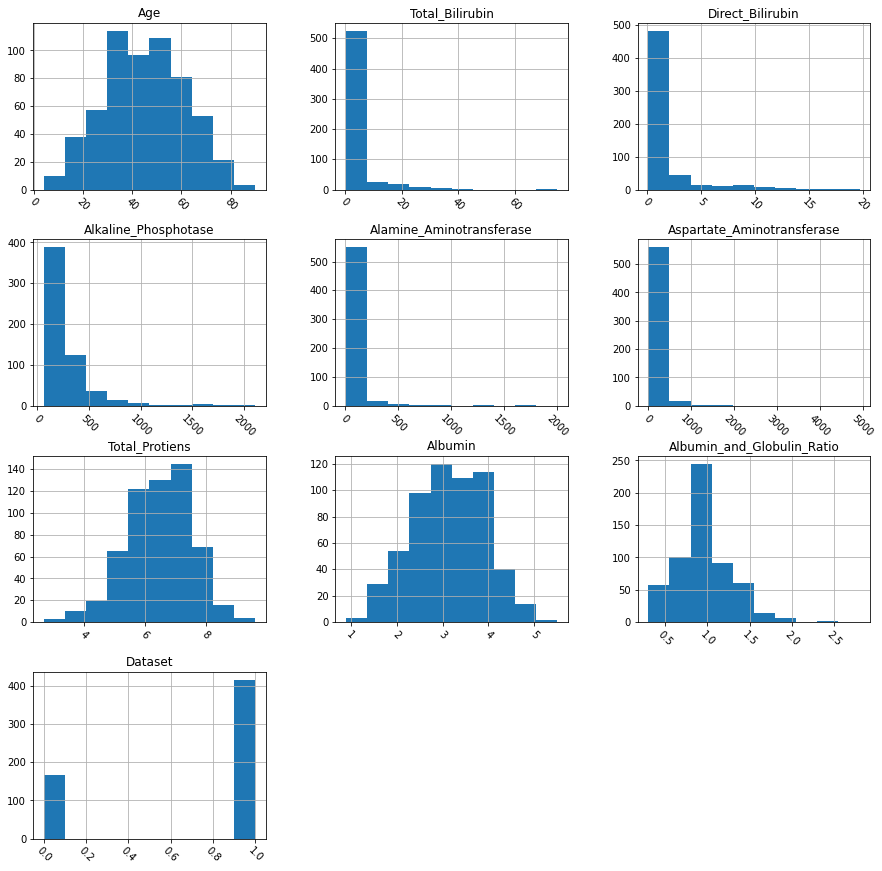

In [260]:
# Plot histogram grid
data.hist(figsize=(15,15), xrot=-45, bins=10)
plt.show()

In [261]:
#statistics of data
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


<AxesSubplot:>

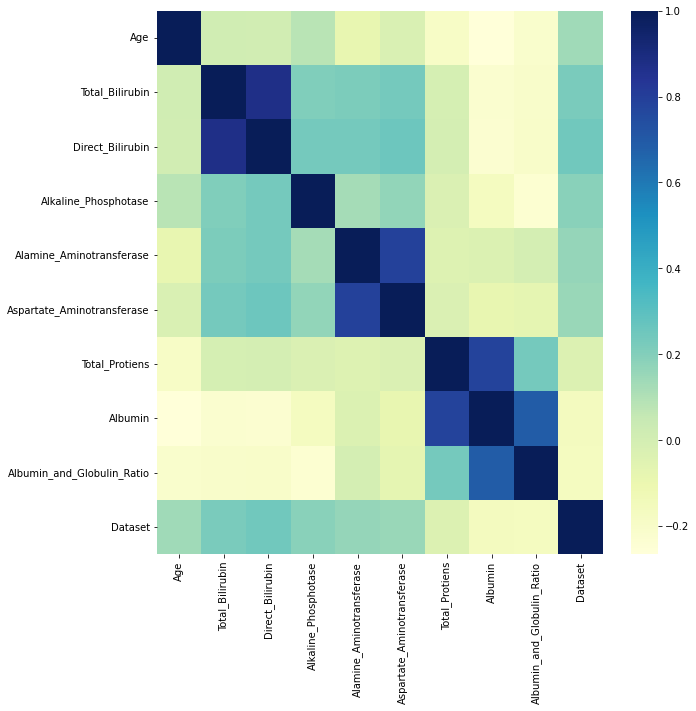

In [262]:
#checking correlation among the variables
data.corr()

#Drawing heatmap

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap="YlGnBu")

In [263]:
#Data Cleaning

#Removing duplicates
data = data.drop_duplicates()
print(data.shape )

(570, 10)


In [264]:
data.Aspartate_Aminotransferase.sort_values(ascending=False).head()
data = data[data.Aspartate_Aminotransferase <=2500 ]
data.isnull().values.any()
data=data.dropna(how='any')
data.shape
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [265]:
#Data Standardization
Y = data.Dataset
X = data.drop('Dataset', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=1234,stratify=data.Dataset)
datatrain_mean = X_train.mean()
train_desc = X_train.std()
X_train = (X_train - datatrain_mean) / train_desc
X_train.describe()

X_test = (X_test - datatrain_mean) / train_desc
X_test.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,0.109816,-0.062052,-0.033465,-0.048222,-0.017203,0.007819,-0.082507,-0.175052,-0.218486
std,0.937258,0.835512,1.046110,0.734043,0.661163,0.874507,0.962887,0.922474,0.851370
min,-2.338273,-0.445930,-0.501397,-0.768218,-0.394377,-0.469597,-2.655723,-2.198667,-1.718105
25%,-0.577433,-0.399619,-0.465814,-0.444170,-0.321831,-0.401738,-0.741541,-0.836070,-0.801792
50%,0.090472,-0.384182,-0.430231,-0.342661,-0.261377,-0.316914,-0.012329,-0.216708,-0.190916
75%,0.940533,-0.198937,-0.181150,-0.018612,-0.007466,-0.034168,0.625732,0.526527,0.114522
max,1.851312,4.231512,5.974717,3.147694,4.834965,4.263572,2.175308,2.136869,2.558026


In [266]:
#Gaussian Naives Bayes Implementation

from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=1234,stratify=data.Dataset)
gaussian.fit(X_train, Y_train)
gauss_predicted = gaussian.predict(X_test)


print('Guassian Naives Bayes Traning Score: \n',gaussian.score(X_train,Y_train))
print('Guassian Naives Bayes Test Score: \n',gaussian.score(X_test,Y_test))
print('Guassian Naives Bayes Accuracy: \n', accuracy_score(Y_test,gauss_predicted))

Guassian Naives Bayes Traning Score: 
 0.565410199556541
Guassian Naives Bayes Test Score: 
 0.5929203539823009
Guassian Naives Bayes Accuracy: 
 0.5929203539823009


In [267]:
#Support Vector Machine Implementation 

from sklearn import svm
from sklearn.svm import SVC
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=1234,stratify=data.Dataset)
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
SVM_pred = model_SVR.predict(X_test)

print('Support Vector Machine Traning Score: \n',model_SVR.score(X_train,Y_train))
print('Support Vector Machine Test Score: \n',model_SVR.score(X_test,Y_test))
print('Support Vector Machine Accuracy: \n', accuracy_score(Y_test,np.round(abs(SVM_pred))))


Support Vector Machine Traning Score: 
 -0.16766533456959665
Support Vector Machine Test Score: 
 -0.1622315151167273
Support Vector Machine Accuracy: 
 0.7168141592920354


In [273]:
performance = [['Gaussian Naives Bayes Accuracy',accuracy_score(Y_test,gauss_predicted)*100],
                    ['Support Vector Machine Accuracy',accuracy_score(Y_test,np.round(abs(SVM_pred)))*100]]

predict_df = pd.DataFrame(performance,columns = ['Model','%Accuracy'])
predict_df

,Model,%Accuracy
0,Gaussian Naives Bayes Accuracy,59.292035
1,Support Vector Machine Accuracy,71.681416


In [269]:
#Evaluation report for Gaussian Naives Bayes

from sklearn.metrics import classification_report

print(classification_report(Y_test,gauss_predicted))

              precision    recall  f1-score   support

           0       0.41      0.97      0.57        32
           1       0.97      0.44      0.61        81

    accuracy                           0.59       113
   macro avg       0.69      0.71      0.59       113
weighted avg       0.81      0.59      0.60       113



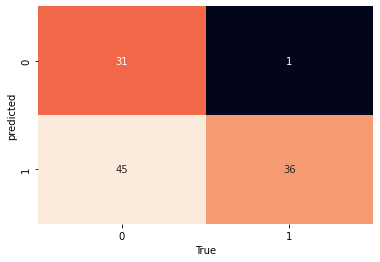

In [270]:
#confusion matrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_test, gauss_predicted)

def plot_conf(conf_mat):
    ax= sns.heatmap(conf_mat, annot=True,cbar=False)
    plt.xlabel("True")
    plt.ylabel("predicted")
plot_conf(conf_mat)


In [271]:
#Evaluation report for SVM

from sklearn.metrics import classification_report

print(classification_report(Y_test,np.round(abs(SVM_pred))))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.72      1.00      0.84        81

    accuracy                           0.72       113
   macro avg       0.36      0.50      0.42       113
weighted avg       0.51      0.72      0.60       113



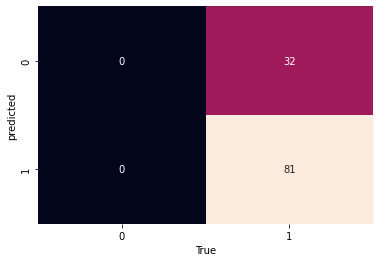

In [272]:
#confusion matrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_test, np.round(abs(SVM_pred)))

def plot_conf(conf_mat):
    ax= sns.heatmap(conf_mat, annot=True,cbar=False)
    plt.xlabel("True")
    plt.ylabel("predicted")
plot_conf(conf_mat)
